In [16]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [17]:
from neuralprophet import NeuralProphet, set_random_seed, set_log_level
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.helper import CustomizedLoss
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

set_random_seed(0)
# Disable logging messages unless there is an error
set_log_level("ERROR")


In [ ]:
def modify(df, forecast=5):
    # figure out where 'yhat1' lives
    col_idx = df.columns.get_loc('yhat1')

    # loop 1…9
    for i in range(1, forecast):
        # compute which yhatN we need
        which = forecast - i + 1          # 10→1, 9→2, …, 2→9
        val   = df.iloc[-i][f'yhat{which}'] 
        # row number = -i (so i=1 → last row, i=9 → 9th-from-last)
        df.iat[-i, col_idx] = val

    j = 0
    for i in range(forecast+1, forecast+6):
        which = min(5, forecast - j +1)
        print(which)
        print(df.iloc[-i]['ds'])

        val = df.iloc[-i][f'yhat{which}']
        df.iat[-i, col_idx] = val
        j += 1

In [19]:

# 1) Instantiate a NeuralProphet model that learns from the past 60 days (n_lags)
#    to forecast the next 10 days (n_forecasts), with trend + all seasonalities on.
m = NeuralProphet(
    n_lags=45,                 # look back this many days as inputs
    n_forecasts=5,            # predict this many days ahead
    yearly_seasonality=True,   # model an annual cycle
    weekly_seasonality=True,   # model day-of-week cycle
    daily_seasonality=False,    # if intra-day data; set False for daily only
    seasonality_mode='additive',
    n_changepoints=10,
    # you can also tweak trend flexibility:
    trend_reg=0.5,                  
    trend_reg_threshold=True,
    normalize='standardize',
    drop_missing=True,
)
m.set_plotting_backend("plotly-static")
# m.add_country_holidays('VN')

In [20]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)

df_1.drop(columns=['Index'], inplace=True)

df = (
    df_1[['Date', 'VN_Index_Close']].rename(columns={
          'Date': 'ds',
          'VN_Index_Close': 'y'
      })
)

# convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'])


In [21]:
df.columns

Index(['ds', 'y'], dtype='object')

In [22]:
# m.add_lagged_regressor('Total Volume', normalize='standardize')

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/242 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

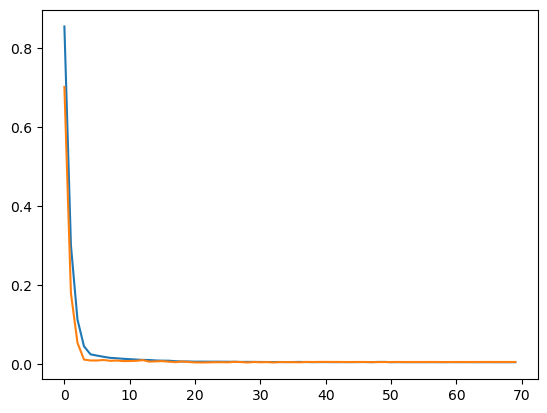

In [23]:
# 2) compute how many rows you need for validation
n_val = m.n_lags + m.n_forecasts  # must equal 60 + 10 = 70

# 3) split your DataFrame by row‐count
train_df = df.iloc[:-n_val]
val_df   = df.iloc[-n_val:]

# 4) fit using the fixed‐size validation set
metrics = m.fit(
    train_df,
    freq="B",
    validation_df=val_df,
    progress="plot",
)


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




           ds            y        yhat1        yhat2        yhat3  \
0  2025-02-14  1276.080000          NaN          NaN          NaN   
1  2025-02-17  1272.720000          NaN          NaN          NaN   
2  2025-02-18  1278.140000          NaN          NaN          NaN   
3  2025-02-19  1288.560000          NaN          NaN          NaN   
4  2025-02-20  1292.980000          NaN          NaN          NaN   
5  2025-02-21  1296.750000          NaN          NaN          NaN   
6  2025-02-24  1304.560000          NaN          NaN          NaN   
7  2025-02-25  1303.160000          NaN          NaN          NaN   
8  2025-02-26  1302.960000          NaN          NaN          NaN   
9  2025-02-27  1307.800000          NaN          NaN          NaN   
10 2025-02-28  1305.360000          NaN          NaN          NaN   
11 2025-03-03  1309.370000          NaN          NaN          NaN   
12 2025-03-04  1311.910000          NaN          NaN          NaN   
13 2025-03-05  1304.710000        

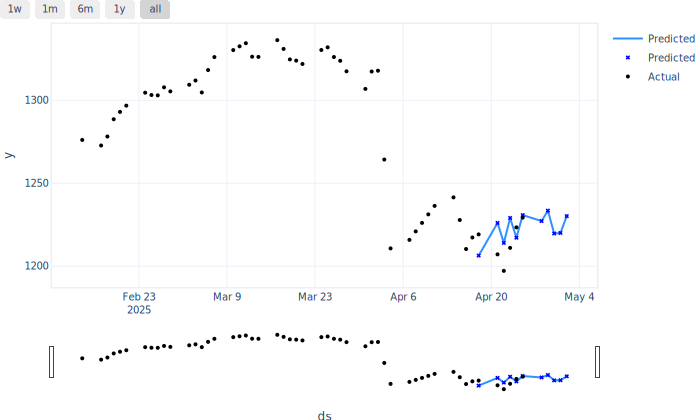

In [40]:
future = m.make_future_dataframe(df, periods=5, n_historic_predictions=False)
forecast = m.predict(future, auto_extend=False, raw=False)

print(forecast)
modify(forecast)
# Visualize the forecast
m.highlight_nth_step_ahead_of_each_forecast(step_number=1)
m.plot(forecast)

In [28]:
forecast.tail(11)

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,ar1,ar2,ar3,ar4,ar5,trend,season_yearly,season_weekly
45,2025-04-18,1219.12,1206.327759,NaN,NaN,NaN,NaN,-64.254242,NaN,NaN,NaN,NaN,1231.692139,-5.063950,43.953800
46,2025-04-21,1207.07,1224.760864,1226.038574,NaN,NaN,NaN,-111.805092,-110.527351,NaN,NaN,NaN,1232.230469,-7.122310,111.457825
47,2025-04-22,1197.13,1220.161865,1226.060547,1213.989014,NaN,NaN,-103.089920,-97.191147,-109.262711,NaN,NaN,1232.409912,-7.768871,98.610802
48,2025-04-23,1211.00,1197.998535,1207.829468,1226.996460,1229.043823,NaN,-49.001492,-39.170601,-20.003592,-17.956282,NaN,1232.589233,-8.392397,22.803209
49,2025-04-24,1223.35,1200.769409,1188.183838,1214.818726,1226.468750,1217.114868,-11.401608,-23.987230,2.647772,14.297664,4.943810,1232.768677,-8.984972,-11.612659
50,2025-04-25,1229.23,1221.611206,1197.420044,1199.390747,1216.808105,1230.772217,-45.717892,-69.909058,-67.938339,-50.521004,-36.556847,1232.948120,-9.545313,43.926254
51,2025-04-28,NaN,1227.169800,1210.141846,1208.368652,1192.642578,1210.033691,-106.887733,-123.915733,-125.688950,-141.414948,-124.023949,1233.486450,-10.997077,111.568192
52,2025-04-29,NaN,1233.451660,1233.451660,1217.302246,1195.680054,1185.455078,NaN,-87.309532,-103.459076,-125.081169,-135.306122,1233.665771,-11.394095,98.489517
53,2025-04-30,NaN,1219.666992,NaN,1219.666992,1215.004761,1201.814331,NaN,NaN,-25.385431,-30.047710,-43.238163,1233.845459,-11.743961,22.951027
54,2025-05-01,NaN,1219.979248,NaN,NaN,1219.979248,1237.135254,NaN,NaN,NaN,9.534608,26.690582,1234.024780,-12.043543,-11.536594


In [ ]:
m.plot_components(forecast)

In [ ]:
forecast.tail(12)

In [ ]:
result = forecast[['ds', 'yhat1']].tail(5).rename(columns={
          'ds': 'Date',
          'yhat1': 'VN_Index_Close'
      })
result.to_csv(f'../result_{m.n_lags}.xlsx')